In [105]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
# Load the temp dataset from txt
# TG_STAID004563
df = pd.read_csv('ECA_blended_custom/TG_STAID004563_copy.txt', header=0)
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [3]:
df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [4]:
xmap={' SOUID':'souid','    DATE':'date','   TG':'temp', ' Q_TG':'q_tg'}
df2 = df.rename(columns = xmap)

df2.head()

,souid,date,temp,q_tg
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [5]:
df2['temp_new'] = df2['temp'].div(10)
df2['date_time']=pd.to_datetime(df2.date, format='%Y%m%d', errors='ignore')
df2 =df2.drop(['souid', 'date', 'temp', 'q_tg'], axis=1)

df2.head()

# discover missing data values in temp
#df4=df3.loc[df3['q_tg'] == 9]
#df4.sort_values(by=['datetime'], ascending=False)

,temp_new,date_time
0,2.2,1876-01-01
1,2.5,1876-01-02
2,0.3,1876-01-03
3,-5.8,1876-01-04
4,-9.8,1876-01-05


In [6]:
df3 =df2
df3["year"] = df3['date_time'].dt.year
df3["month"] = df3['date_time'].dt.month
df3["day"] = df3['date_time'].dt.day
df3.set_index('date_time', inplace=True)
df3 = df3.loc['1946-01-01':]

df3.head()

,temp_new,year,month,day
date_time,,,,
1946-01-01,-3.4,1946,1,1
1946-01-02,-3.0,1946,1,2
1946-01-03,-2.8,1946,1,3
1946-01-04,-2.7,1946,1,4
1946-01-05,1.4,1946,1,5


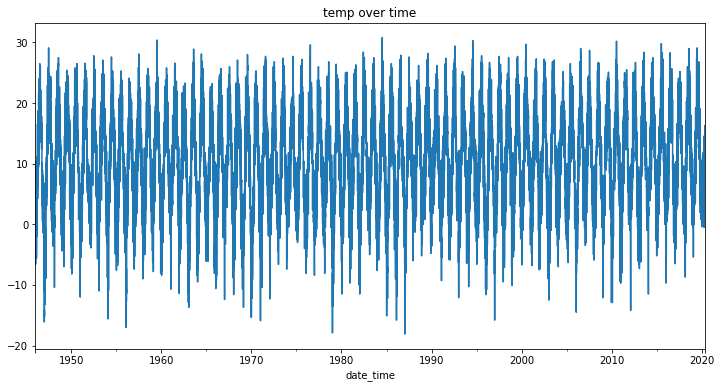

In [7]:
df3.temp_new.plot(figsize=(12,6), title='temp over time')
plt.show()

[Text(0, 0.5, 'temperature'),
 Text(0.5, 0, 'month'),
 Text(0.5, 1.0, 'average temp throughout the months over years'),
 None]

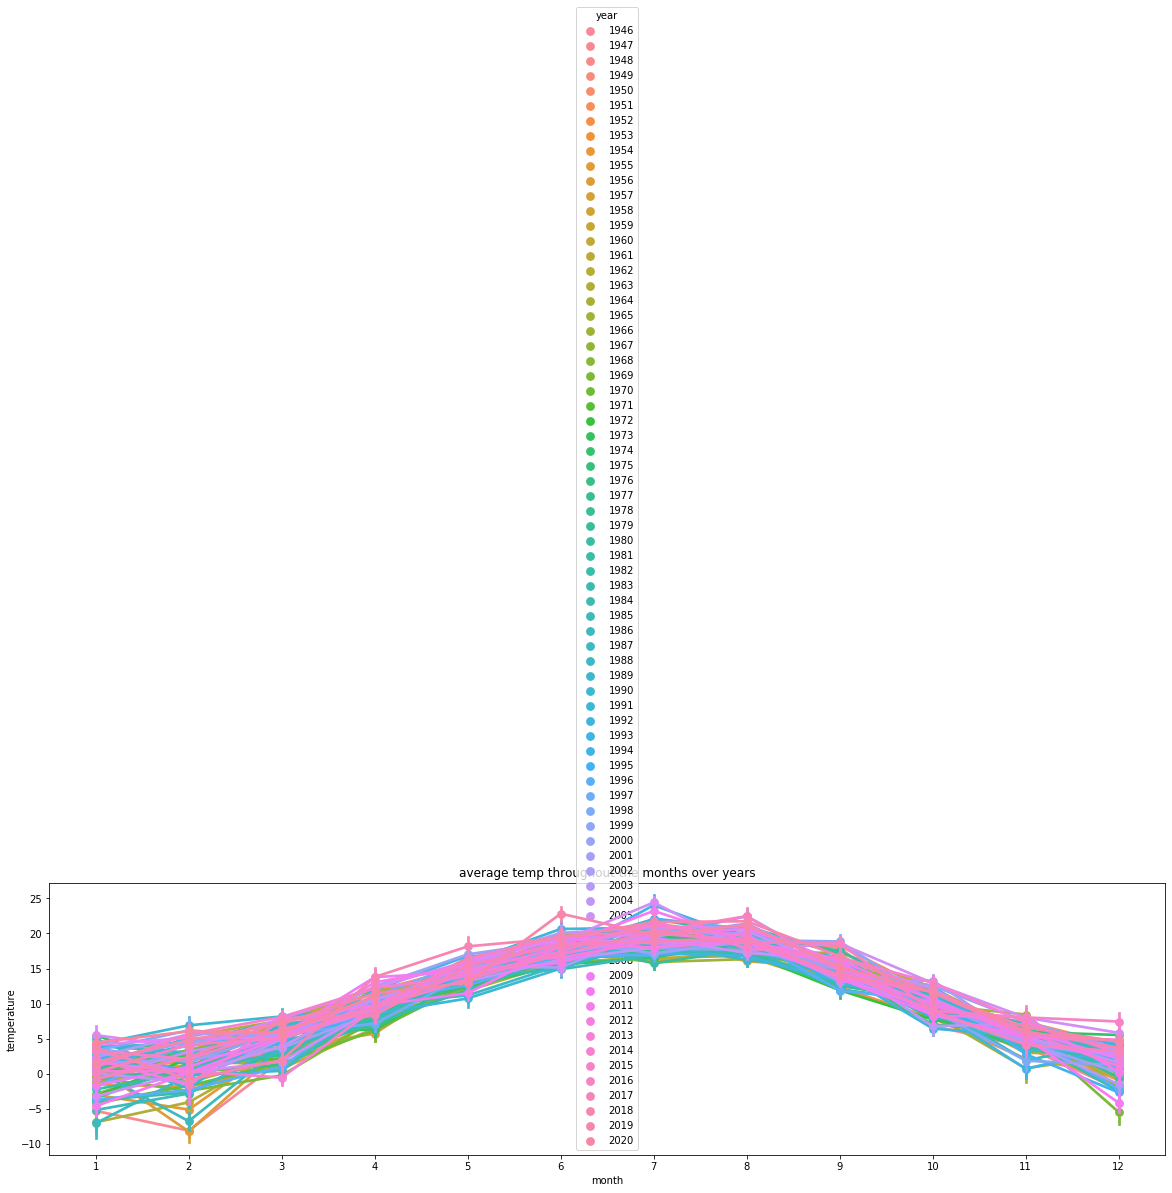

In [8]:
plt.figure(figsize=(20,5))
sns.pointplot(x=df3['month'], 
              y=df3['temp_new'],
              hue=df3['year'], 
              data=df3, join=True).set(xlabel='month', 
                                        ylabel='temperature',
                                                  title="average temp throughout the months over years",
                                                  label='big')

In [9]:
# remove the trend by differencing
df3['1st_temp_diff'] = df3['temp_new'].diff()
df3['2nd_temp_diff'] = df3['1st_temp_diff'].diff()
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff
date_time,,,,,,
1946-01-01,-3.4,1946,1,1,NaN,NaN
1946-01-02,-3.0,1946,1,2,0.4,NaN
1946-01-03,-2.8,1946,1,3,0.2,-0.2
1946-01-04,-2.7,1946,1,4,0.1,-0.1
1946-01-05,1.4,1946,1,5,4.1,4.0


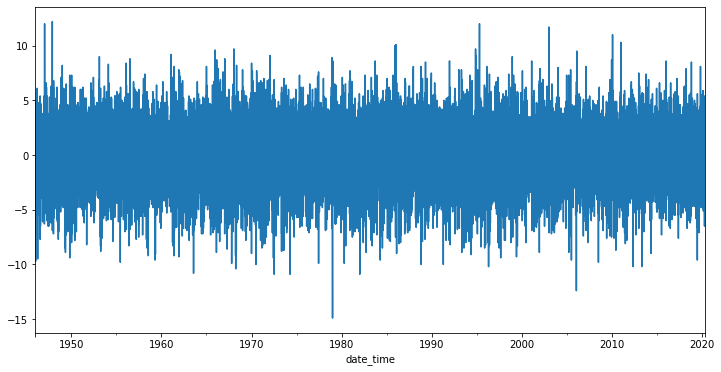

In [10]:
df3['1st_temp_diff'].plot()

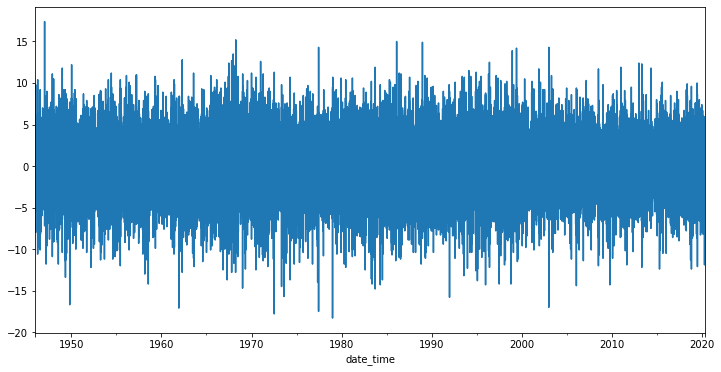

In [11]:
df3['2nd_temp_diff'].plot()

In [12]:
# deseasonalise the data on the basis of column month for first and second instance difference
# aka calculate monthly mean
df3['1st_monthly_mean'] = df3.groupby('month')['1st_temp_diff'].transform('mean')
df3['2nd_monthly_mean'] = df3.groupby('month')['2nd_temp_diff'].transform('mean')
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff,1st_monthly_mean,2nd_monthly_mean
date_time,,,,,,,,
1946-01-01,-3.4,1946,1,1,NaN,NaN,-0.00142,-0.009083
1946-01-02,-3.0,1946,1,2,0.4,NaN,-0.00142,-0.009083
1946-01-03,-2.8,1946,1,3,0.2,-0.2,-0.00142,-0.009083
1946-01-04,-2.7,1946,1,4,0.1,-0.1,-0.00142,-0.009083
1946-01-05,1.4,1946,1,5,4.1,4.0,-0.00142,-0.009083


In [13]:
# check the data - delete later
df3.groupby('month')['1st_monthly_mean'].get_group(7)

date_time
1946-07-01    0.059808
1946-07-02    0.059808
1946-07-03    0.059808
1946-07-04    0.059808
1946-07-05    0.059808
                ...   
2019-07-27    0.059808
2019-07-28    0.059808
2019-07-29    0.059808
2019-07-30    0.059808
2019-07-31    0.059808
Name: 1st_monthly_mean, Length: 2294, dtype: float64

In [14]:
# demean the series
df3['1st_deseasonalized'] = df3['1st_temp_diff'] - df3['1st_monthly_mean']
df3['2nd_deseasonalized'] = df3['2nd_temp_diff'] - df3['2nd_monthly_mean']
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff,1st_monthly_mean,2nd_monthly_mean,1st_deseasonalized,2nd_deseasonalized
date_time,,,,,,,,,,
1946-01-01,-3.4,1946,1,1,NaN,NaN,-0.00142,-0.009083,NaN,NaN
1946-01-02,-3.0,1946,1,2,0.4,NaN,-0.00142,-0.009083,0.40142,NaN
1946-01-03,-2.8,1946,1,3,0.2,-0.2,-0.00142,-0.009083,0.20142,-0.190917
1946-01-04,-2.7,1946,1,4,0.1,-0.1,-0.00142,-0.009083,0.10142,-0.090917
1946-01-05,1.4,1946,1,5,4.1,4.0,-0.00142,-0.009083,4.10142,4.009083


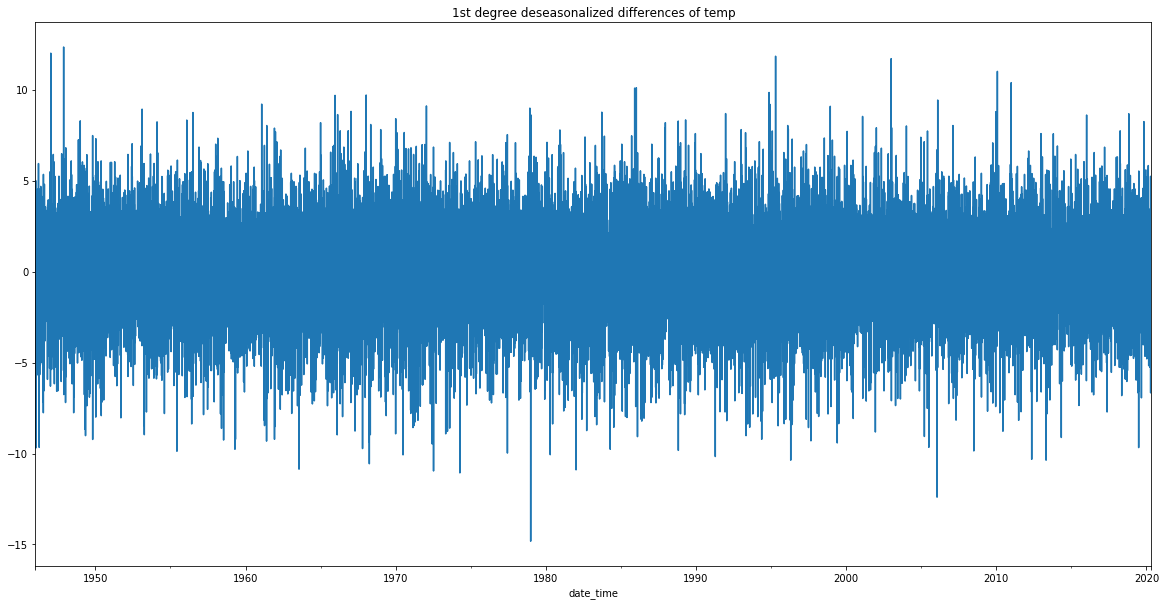

In [15]:
df3['1st_deseasonalized'].plot(figsize=(20,10), title='1st degree deseasonalized differences of temp')

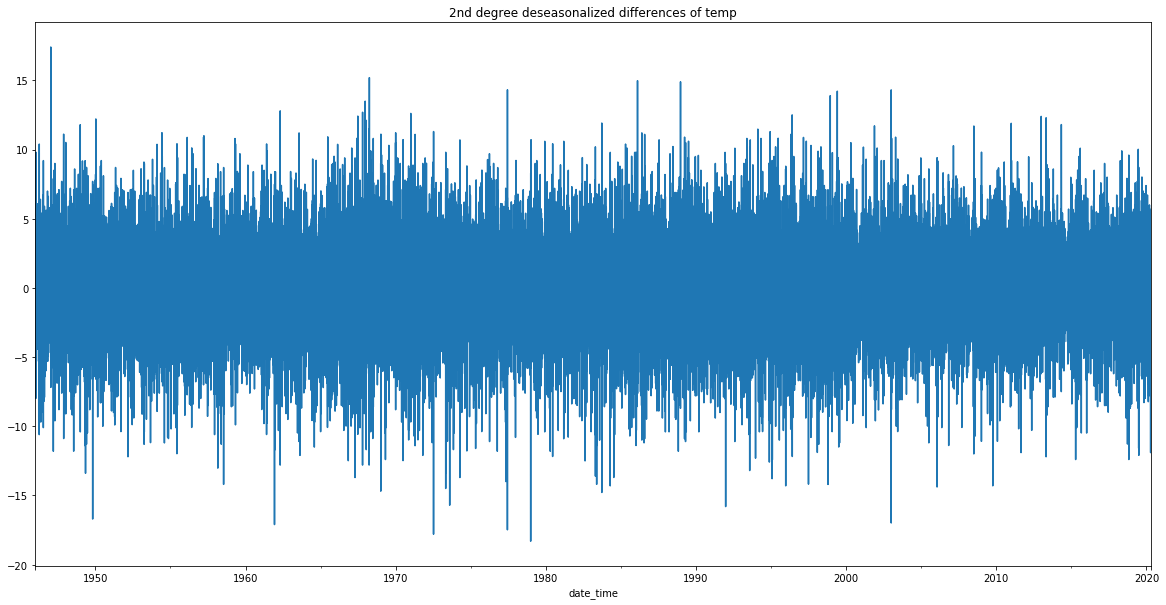

In [16]:
df3['2nd_deseasonalized'].plot(figsize=(20,10), title='2nd degree deseasonalized differences of temp')

In [18]:
df3.fillna(method='bfill', inplace=True)
df3.isna().sum()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


temp_new              0
year                  0
month                 0
day                   0
1st_temp_diff         0
2nd_temp_diff         0
1st_monthly_mean      0
2nd_monthly_mean      0
1st_deseasonalized    0
2nd_deseasonalized    0
1st_re_diff           0
2nd_re_diff           0
dtype: int64

In [19]:
# reconstruct the data, to check for errors in calculation
# add back the monthly mean

df3['1st_re_diff'] = df3['1st_deseasonalized'] + df3['1st_monthly_mean']
df3['2nd_re_diff'] = df3['2nd_deseasonalized'] + df3['2nd_monthly_mean']
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff,1st_monthly_mean,2nd_monthly_mean,1st_deseasonalized,2nd_deseasonalized,1st_re_diff,2nd_re_diff
date_time,,,,,,,,,,,,
1946-01-01,-3.4,1946,1,1,0.4,-0.2,-0.00142,-0.009083,0.40142,-0.190917,0.4,-0.2
1946-01-02,-3.0,1946,1,2,0.4,-0.2,-0.00142,-0.009083,0.40142,-0.190917,0.4,-0.2
1946-01-03,-2.8,1946,1,3,0.2,-0.2,-0.00142,-0.009083,0.20142,-0.190917,0.2,-0.2
1946-01-04,-2.7,1946,1,4,0.1,-0.1,-0.00142,-0.009083,0.10142,-0.090917,0.1,-0.1
1946-01-05,1.4,1946,1,5,4.1,4.0,-0.00142,-0.009083,4.10142,4.009083,4.1,4.0


In [47]:
# reconstruct original temperature
df3['1st_re_temp'] = df3['1st_re_diff']
df3.loc[df3.index[0], '1st_re_temp'] = df3.loc[df3.index[0], 'temp_new']
df3['1st_re_temp'] = np.cumsum(df3['1st_re_temp'])

df3.head()


/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff,1st_monthly_mean,2nd_monthly_mean,1st_deseasonalized,2nd_deseasonalized,1st_re_diff,2nd_re_diff,1st_re_temp
date_time,,,,,,,,,,,,,
1946-01-01,-3.4,1946,1,1,0.4,-0.2,-0.00142,-0.009083,0.40142,-0.190917,0.4,-0.2,-3.4
1946-01-02,-3.0,1946,1,2,0.4,-0.2,-0.00142,-0.009083,0.40142,-0.190917,0.4,-0.2,-3.0
1946-01-03,-2.8,1946,1,3,0.2,-0.2,-0.00142,-0.009083,0.20142,-0.190917,0.2,-0.2,-2.8
1946-01-04,-2.7,1946,1,4,0.1,-0.1,-0.00142,-0.009083,0.10142,-0.090917,0.1,-0.1,-2.7
1946-01-05,1.4,1946,1,5,4.1,4.0,-0.00142,-0.009083,4.10142,4.009083,4.1,4.0,1.4


## Train Test Split

In [114]:
df4 = df3
df4 =df4.drop(['2nd_temp_diff', '2nd_monthly_mean', '2nd_deseasonalized', '1st_re_diff', '2nd_re_diff', '1st_re_temp'], axis=1)
df4.head()


,temp_new,year,month,day,1st_temp_diff,1st_monthly_mean,1st_deseasonalized
date_time,,,,,,,
1946-01-01,-3.4,1946,1,1,0.4,-0.00142,0.40142
1946-01-02,-3.0,1946,1,2,0.4,-0.00142,0.40142
1946-01-03,-2.8,1946,1,3,0.2,-0.00142,0.20142
1946-01-04,-2.7,1946,1,4,0.1,-0.00142,0.10142
1946-01-05,1.4,1946,1,5,4.1,-0.00142,4.10142


In [115]:
test = df4[-14:]['1st_deseasonalized']
train = df4[-28:-14]['1st_deseasonalized']
train.shape, test.shape

((14,), (14,))

## Train Arima Model

In [100]:
m = ARIMA(train, order=(1,1,3))

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [101]:
m_fit = m.fit()

ValueError: The model specification cannot be estimated. The model contains 7 regressors (0 trend, 0 seasonal, 7 lags) but after adjustment for hold_back and creation of the lags, there are only 6 data points available to estimate parameters.

In [102]:
output = m_fit.forecast(steps=14)

In [103]:
ypred = output[0]

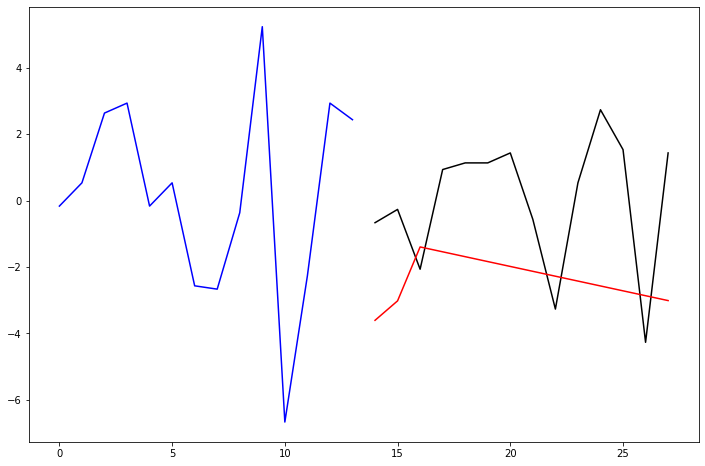

In [104]:
plt.figure(figsize=(12,8))
plt.plot(range(14), train, color='blue')
plt.plot(range(14,28), test, color='black')
plt.plot(range(14,28), ypred, color='red')

## Linear Reg Model

In [116]:
df4['deseasonalized'] = df4['1st_deseasonalized']
for i in range(1,5):
    df4[f'{i}_shift_de_diff_temp'] = df4.deseasonalized.shift(i)
df4 = df4.fillna(method='bfill')
df4.head()

,temp_new,year,month,day,1st_temp_diff,1st_monthly_mean,1st_deseasonalized,deseasonalized,1_shift_de_diff_temp,2_shift_de_diff_temp,3_shift_de_diff_temp,4_shift_de_diff_temp
date_time,,,,,,,,,,,,
1946-01-01,-3.4,1946,1,1,0.4,-0.00142,0.40142,0.40142,0.40142,0.40142,0.40142,0.40142
1946-01-02,-3.0,1946,1,2,0.4,-0.00142,0.40142,0.40142,0.40142,0.40142,0.40142,0.40142
1946-01-03,-2.8,1946,1,3,0.2,-0.00142,0.20142,0.20142,0.40142,0.40142,0.40142,0.40142
1946-01-04,-2.7,1946,1,4,0.1,-0.00142,0.10142,0.10142,0.20142,0.40142,0.40142,0.40142
1946-01-05,1.4,1946,1,5,4.1,-0.00142,4.10142,4.10142,0.10142,0.20142,0.40142,0.40142


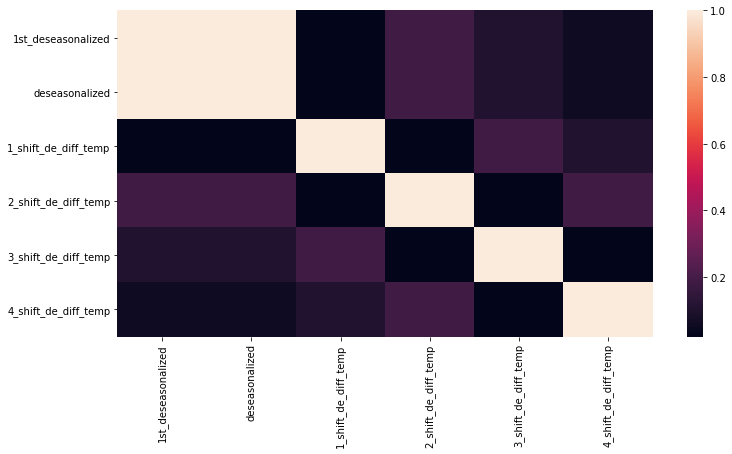

In [117]:
sns.heatmap(df4.drop([x for x in df4.columns if 'de' not in x], axis=1).corr().abs())

In [118]:
feature = ['2_shift_de_diff_temp']

In [125]:
xtrain = df4[-28:-14][feature] 
xtest = df4[-14:][feature] 
ytrain = df4[-28:-14]['1st_deseasonalized']
ytest = df4[-14:]['1st_deseasonalized']

In [126]:
m = LinearRegression()

In [127]:
m.fit(Xtrain,ytrain)

LinearRegression()

In [128]:
ypred = m.predict(Xtest) #out of sample prediction

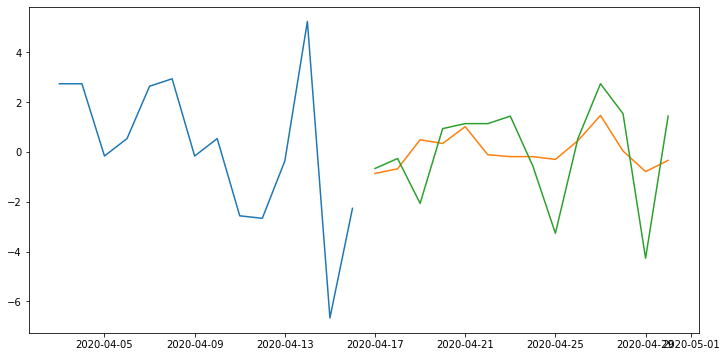

In [130]:
plt.plot(xtrain)
plt.plot(xtest.index, ypred) # orange line is our  stationary passenger prediction
plt.plot(xtest.index, ytest) #green line is our actual stationary passenger data

In [131]:
m.score(xtrain,ytrain), m.score(xtest,ytest) 

(0.14174203737848412, 0.2388115358110795)